## Data science pipeline: pandas, seaborn, scikit-learn

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Make the first col as index

In [9]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


TV, radio and newspaper are the dollar amount spent and sales is the response 22.1

## Visualizing data using seaborn

**Seaborn**: Python library for statistical data visualization built on top of Matplotlib

In [10]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

In [12]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

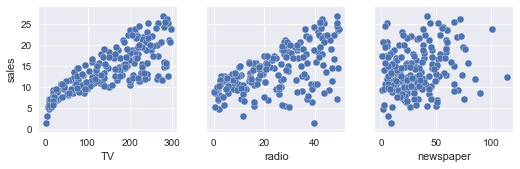

In [13]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales')

Increase the size and aspect ratio

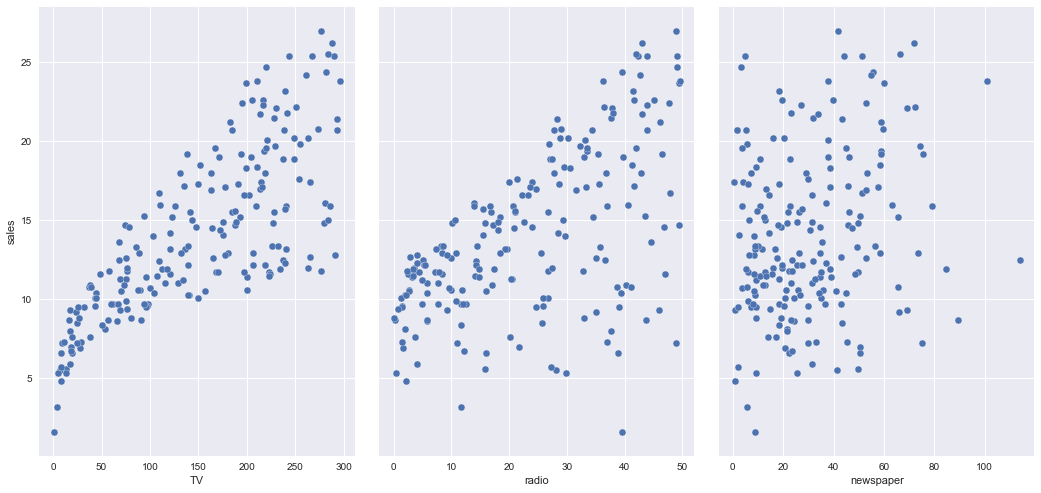

In [14]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7)

You can also ask pairplot to display regression line with a simple argument

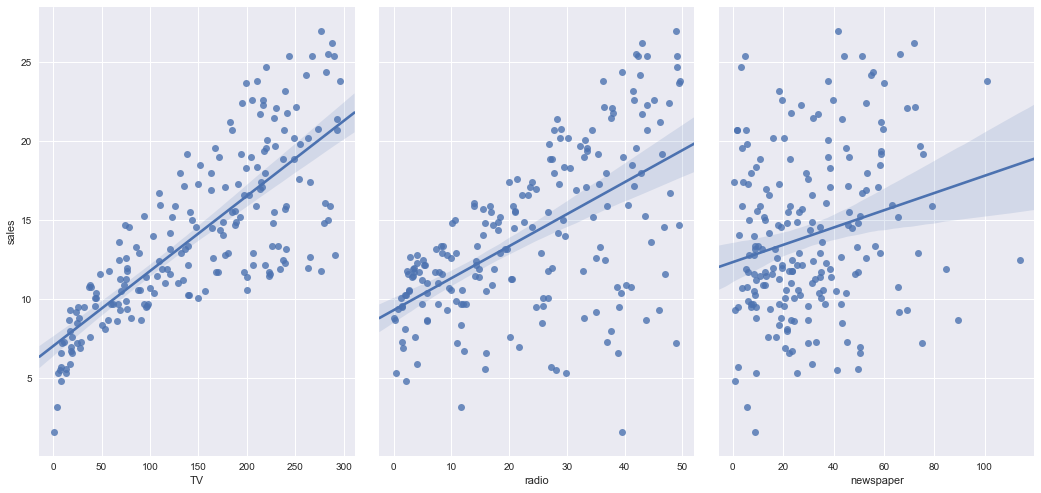

In [15]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Because there appears a linear relationship between the features and sales, this is a great candidate for linear regression method.

## Preparing X and y using pandas

Before we can start the modelling process with scikit-learn, we first have to define the feature matrix (X) and response vector (y). Remember scikit-learn is expecting X and y to be NumPy arrays. **However**, we are lucky in that pandas is built on top of NumPy, **meaning that there is a NumPy array storing the data frame data. ** Therefore, our X can be pandas data frame and our y can be a pandas Series and scikit-learn will understand how to access the underlying NumPy arrays!! How cool is that!!

Let's start with X, what we need is a dataframe that contains only our three features. 

In [16]:
# create a python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original dataframe
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


Let's prepare y, by selecting the sales Series from the dataframe

In [20]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print first 5 rows
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [21]:
# check the type and shape
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

Our final step before using linear regression is to split X and y into training and testing sets for proper model evaluation. As we saw earlier, we used the `train_test_split` function to split X and y into X_train X_test objects and y_train and y_test objects.

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear regression in scikit-learn

Finally, lets build our linear regression model using scikit-learn. We follow the same pattern as previously which is:
* Import the model
* Instantiate the estimator/model
* Fit/train the model
* Predict on test data

In [24]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Every model differs in terms of what occurs during the fitting step. In the case of KNN classifier, all the model did during fitting was to memorize the training data so that it could later calculate the distance between a new observation and the existing observations. In the case of Linear regression, the model is learning the intercept and coefficients of the line-of-best-fit. Then it has an easy formula to predict during the predict step.

## Interpreting model coefficients

As I mentioned previously, linear regression is a highly interpretable model, lets see what that means by printing out the intercept and coefficients and interpreting them.

In [25]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


The intercept and coefficients are stored in separate attributes of the linreg object. You will notice that they end in underscores, this is scikit-learn's convention to indicate that they were estimated from the data. 

The coefficients are stored in the `coef_` attribute as a list in the same order as the features. It is hard to remember which coefficient is associated with which feature, so we can use python's `zip` function to pair the feature names with the coefficients.

In [26]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [31]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

>Unlike in Python 2, the zip function in Python 3 returns an iterator. Iterators can only be exhausted (by something like making a list out of them) once. The purpose of this is to save memory by only generating the elements of the iterator as you need them, rather than putting it all into memory at once.

>zip() is a generator; it produces the values just once. list() creates a list of any iterable (including generators). List objects are not generators, they keep track of all values contained.

## Making predictions

In [32]:
y_pred = linreg.predict(X_test)

Previously, we used the classification accuracy as our evaluation metric though that metric is not relevant for regression problems because regression problems have a continuous response. Let's take a look at some common evaluation metrics for regression problems and choose one to evaluate our predictions

We will start by making some example numeric predictions then evaluate them using a given metric so that we can get a feel for how those metrics work.

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [33]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

In [35]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors

In [36]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


Mean Squared error is a bit harder to interpret as it is not in the same units as MAE or RMSE

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

In [37]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


You might have noticed that our RMSE is a bit larger than our MAE, due to the fact that RMSE squares the errors and thus increases the weight of the larger errors.

Comparing these metrics:
* **MAE** is the easiest to understand, because it's the average error.
* **MSE** is more popular than MAE, because MSE "punishes" larger errors.
* **RMSE** is even more popular than MSE, because RMSE is interpretable in the 'y' units

As such, lets go ahead and choose **RMSE** as our evaluation metric for evaluating our Sales predictions.

## Computing the RMSE for our Sales predictions

In [38]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


This seems pretty good, since our sales ranged from 5 to 25.

In the last chapter we saw that train_test_split helped us to choose between models and tuning parameters. Linear regression doesn't have any tuning parameters. However, the train-test-split can also help us choosing features. When we visualized the features we saw that Newspaper had the weakest correlation with sales, so let's remove that from our model and see if that improves our RMSE

## Feature selection

Does **Newspaper** "belong" in our model ? In other words, does it improve the quality of our predictions ? Let's remove it from the model and check the RMSE!

In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']